# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = 'london'
city_url = url + "appid=" + weather_api_key + "&q=" + city
city_weather = requests.get(city_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1690058293,
 'id': 2643743,
 'main': {'feels_like': 288.95,
          'humidity': 94,
          'pressure': 1005,
          'temp': 288.87,
          'temp_max': 289.4,
          'temp_min': 288.01},
 'name': 'London',
 'rain': {'1h': 1.89},
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1689998949,
         'sunset': 1690056261,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 210, 'speed': 5.14}}


In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        
        # Adjust Kelvin to Celcius
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | mutoko
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | salavan
Processing Record 5 of Set 1 | khandyga
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | broome
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | edd
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | merikanjaka
City not found. Skipping...
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | fairbanks
Processing Record 21 of Set 1 | port mathu

Processing Record 41 of Set 4 | queenstown
Processing Record 42 of Set 4 | petukhovo
Processing Record 43 of Set 4 | vilyuysk
Processing Record 44 of Set 4 | barra de santo antonio
Processing Record 45 of Set 4 | port hueneme
Processing Record 46 of Set 4 | la paz
Processing Record 47 of Set 4 | la passe
Processing Record 48 of Set 4 | yemva
Processing Record 49 of Set 4 | bati
Processing Record 0 of Set 5 | shingu
Processing Record 1 of Set 5 | manokwari
Processing Record 2 of Set 5 | nadym
Processing Record 3 of Set 5 | invercargill
Processing Record 4 of Set 5 | pizarro
Processing Record 5 of Set 5 | rabaul
Processing Record 6 of Set 5 | revelstoke
Processing Record 7 of Set 5 | joshimath
Processing Record 8 of Set 5 | achinsk
Processing Record 9 of Set 5 | asau village
City not found. Skipping...
Processing Record 10 of Set 5 | krasnogorskiy
Processing Record 11 of Set 5 | hadibu
Processing Record 12 of Set 5 | hithadhoo
Processing Record 13 of Set 5 | khargone
Processing Record 14

Processing Record 32 of Set 8 | mandera
Processing Record 33 of Set 8 | cascais
Processing Record 34 of Set 8 | mata-utu
Processing Record 35 of Set 8 | port alfred
Processing Record 36 of Set 8 | tympaki
Processing Record 37 of Set 8 | goure
Processing Record 38 of Set 8 | ta`u
Processing Record 39 of Set 8 | ban houayxay
Processing Record 40 of Set 8 | alotau
City not found. Skipping...
Processing Record 41 of Set 8 | kolobrzeg
Processing Record 42 of Set 8 | rajura
Processing Record 43 of Set 8 | santa cruz
Processing Record 44 of Set 8 | karwar
Processing Record 45 of Set 8 | gadzhiyevo
Processing Record 46 of Set 8 | utrik
Processing Record 47 of Set 8 | ingeniero guillermo n. juarez
Processing Record 48 of Set 8 | pariaman
Processing Record 49 of Set 8 | waingapu
Processing Record 0 of Set 9 | forster
Processing Record 1 of Set 9 | kapuskasing
Processing Record 2 of Set 9 | strelka
Processing Record 3 of Set 9 | porto de moz
Processing Record 4 of Set 9 | fort st. john
Processing

City not found. Skipping...
Processing Record 22 of Set 12 | cuitzeo del porvenir
Processing Record 23 of Set 12 | tromso
Processing Record 24 of Set 12 | halmstad
Processing Record 25 of Set 12 | russkaya polyana
Processing Record 26 of Set 12 | laojunmiao
Processing Record 27 of Set 12 | lisakovsk
Processing Record 28 of Set 12 | selfoss
Processing Record 29 of Set 12 | kolonia town
Processing Record 30 of Set 12 | valparaiso
Processing Record 31 of Set 12 | shimoda
Processing Record 32 of Set 12 | pago pago
Processing Record 33 of Set 12 | itaituba
Processing Record 34 of Set 12 | tendo
Processing Record 35 of Set 12 | jingling
Processing Record 36 of Set 12 | sutherlin
Processing Record 37 of Set 12 | karasburg
Processing Record 38 of Set 12 | la malbaie
Processing Record 39 of Set 12 | querqueville
Processing Record 40 of Set 12 | saint john's
Processing Record 41 of Set 12 | ketchikan
Processing Record 42 of Set 12 | xique xique
Processing Record 43 of Set 12 | surendranagar
Proc

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,10.76,89,13,3.76,AU,1690058570
1,mutoko,-17.3970,32.2268,9.54,94,4,1.23,ZW,1690058768
2,bredasdorp,-34.5322,20.0403,11.09,90,100,3.17,ZA,1690058768
3,salavan,15.7167,106.4167,22.45,99,99,1.19,LA,1690058583
4,khandyga,62.6667,135.6000,13.94,90,20,1.42,RU,1690058625


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID", mode = 'w')



In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,10.76,89,13,3.76,AU,1690058570
1,mutoko,-17.3970,32.2268,9.54,94,4,1.23,ZW,1690058768
2,bredasdorp,-34.5322,20.0403,11.09,90,100,3.17,ZA,1690058768
3,salavan,15.7167,106.4167,22.45,99,99,1.19,LA,1690058583
4,khandyga,62.6667,135.6000,13.94,90,20,1.42,RU,1690058625


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

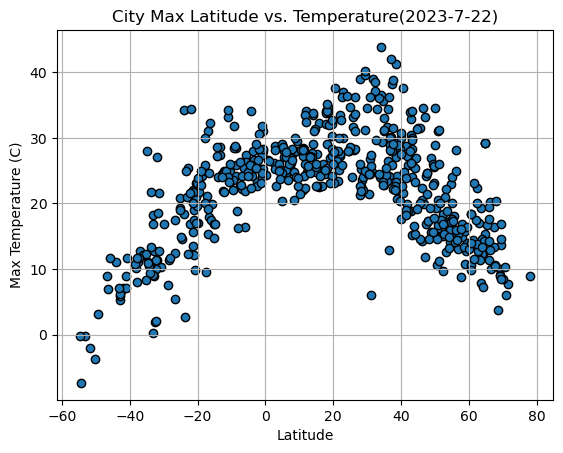

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature(2023-7-22)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

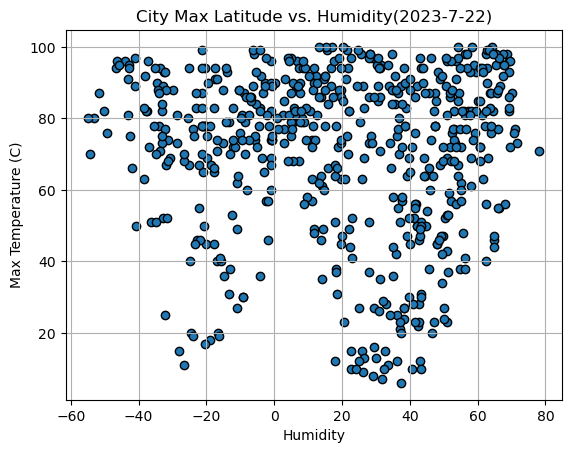

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Humidity')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Humidity(2023-7-22)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

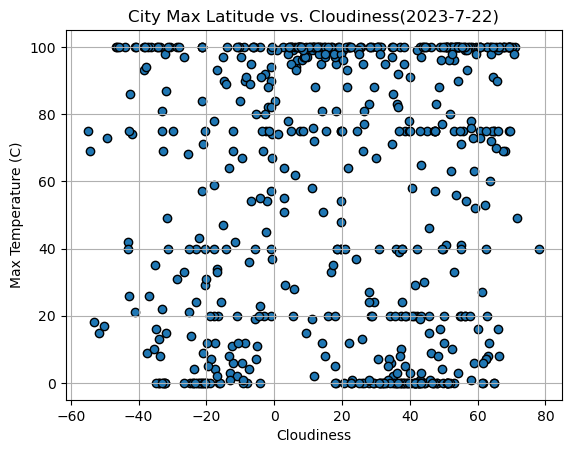

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Cloudiness')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Cloudiness(2023-7-22)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

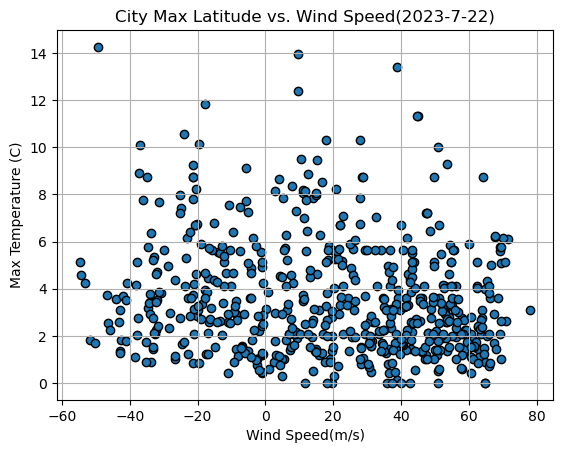

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Wind Speed(m/s)')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Wind Speed(2023-7-22)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def regress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']> 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,salavan,15.7167,106.4167,22.45,99,99,1.19,LA,1690058583
4,khandyga,62.6667,135.6000,13.94,90,20,1.42,RU,1690058625
5,praia da vitoria,38.7333,-27.0667,24.14,83,20,0.12,PT,1690058188
6,longyearbyen,78.2186,15.6401,8.91,71,40,3.09,SJ,1690058536
8,broome,42.2506,-75.8330,27.21,50,20,4.63,US,1690058203


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,10.76,89,13,3.76,AU,1690058570
1,mutoko,-17.3970,32.2268,9.54,94,4,1.23,ZW,1690058768
2,bredasdorp,-34.5322,20.0403,11.09,90,100,3.17,ZA,1690058768
7,chonchi,-42.6128,-73.8092,6.73,75,86,1.83,CL,1690058171
9,edinburgh of the seven seas,-37.0676,-12.3116,12.77,72,26,10.10,SH,1690058769


###  Temperature vs. Latitude Linear Regression Plot

y = -0.24x + 32.46
Correlation (r): -0.6122327580487573


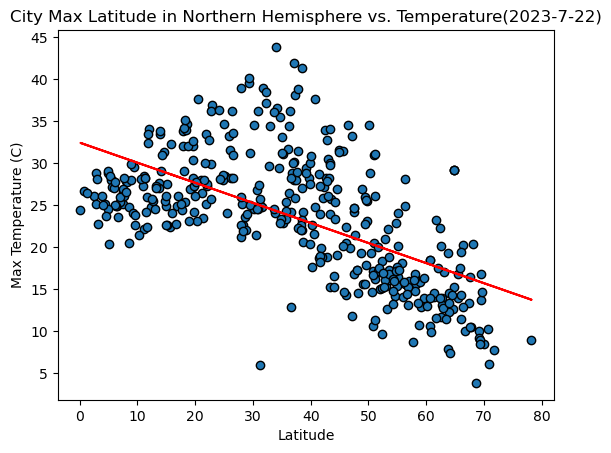

In [81]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], edgecolor='black')

# Pull from the regress function I made
line_y = regress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

# Plot the regress function
plt.plot(northern_hemi_df['Lat'],line_y, color='red')

# Add the regression and r squared values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
corr = f"Correlation (r): {rvalue:}"

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude in Northern Hemisphere vs. Temperature(2023-7-22)')
# Show plot
print(equation)
print(corr)
plt.show()

y = 0.5x + 29.16
Correlation (r): 0.807529851060467


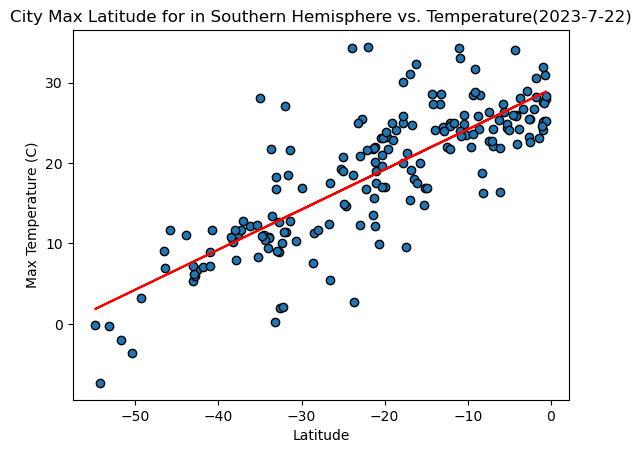

In [82]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], edgecolor='black')

# Pull from the regress function I made
line_y = regress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

# Plot the regress function
plt.plot(southern_hemi_df['Lat'],line_y, color='red')

# Add the regression and r squared values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
corr = f"Correlation (r): {rvalue:}"

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude for in Southern Hemisphere vs. Temperature(2023-7-22)')
# Show plot
print(equation)
print(corr)
plt.show()

**Discussion about the linear relationship:** 
- Looking at the Northern Hemisphere graph, the maximum temperature decreases as the lines of latitude increase. This makes logical sense as the equator receives the most direct sunlight and as we move away from the equator in a northly direction (latitude increase), the received direct sunlight decreases and therefore maximum temperature would likely decrease as well.
- For the souther hemisphere the inverse is true as we increase in out latitude values beginning at negative -90, though the data only shows down to about -45. As we increase our latitude and approach the equator, our temperatures increase as the latitude receives more direct sunlight.

### Humidity vs. Latitude Linear Regression Plot

y = 0.01x + 69.15
Correlation (r): 0.009101004720046702


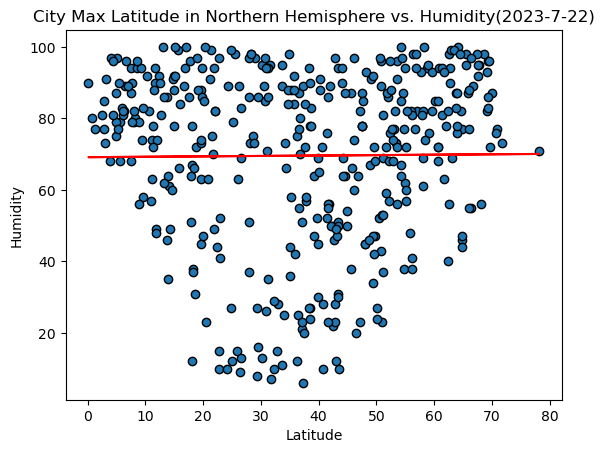

In [86]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], edgecolor='black')

# Pull from the regress function I made
line_y = regress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

# Plot the regress function
plt.plot(northern_hemi_df['Lat'],line_y, color='red')

# Add the regression and r squared values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
corr = f"Correlation (r): {rvalue:}"

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude in Northern Hemisphere vs. Humidity(2023-7-22)')
# Show plot
print(equation)
print(corr)
plt.show()

y = -0.13x + 69.67
Correlation (r): -0.08756687822983258


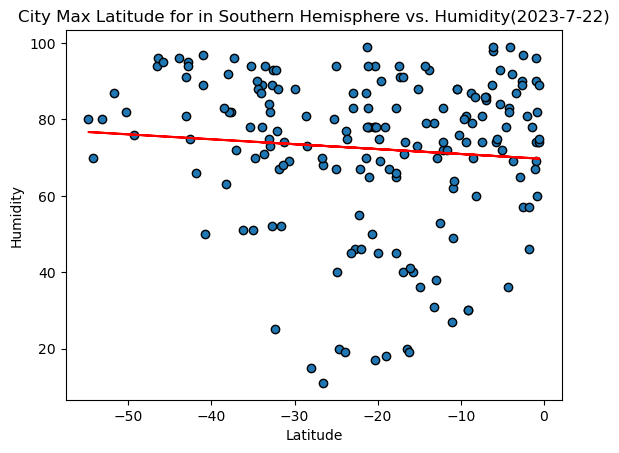

In [87]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], edgecolor='black')

# Pull from the regress function I made
line_y = regress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

# Plot the regress function
plt.plot(southern_hemi_df['Lat'],line_y, color='red')

# Add the regression and r squared values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
corr = f"Correlation (r): {rvalue:}"

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude for in Southern Hemisphere vs. Humidity(2023-7-22)')
# Show plot
print(equation)
print(corr)
plt.show()

**Discussion about the linear relationship:** 
- Based on our r squared values and relatively flat regression lines, there is no real indication of any correlation between latitude and humidity. This would suggest that the Earth's humidity is evenly or close to evenly distributed.

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.24x + 67.73
Correlation (r): -0.11261771302770836


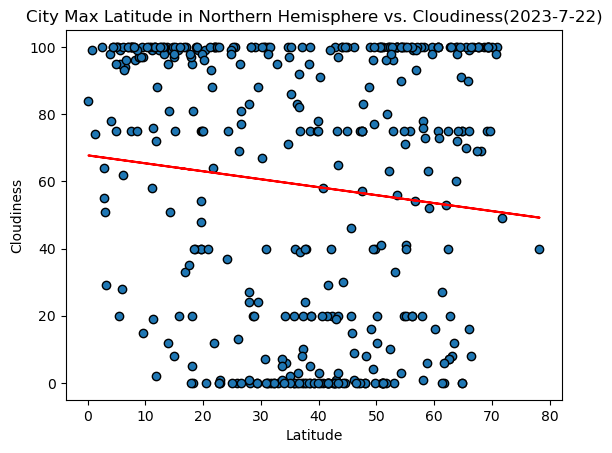

In [88]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], edgecolor='black')

# Pull from the regress function I made
line_y = regress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

# Plot the regress function
plt.plot(northern_hemi_df['Lat'],line_y, color='red')

# Add the regression and r squared values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
corr = f"Correlation (r): {rvalue:}"

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude in Northern Hemisphere vs. Cloudiness(2023-7-22)')
# Show plot
print(equation)
print(corr)
plt.show()

y = 0.03x + 49.16
Correlation (r): 0.010562608795789744


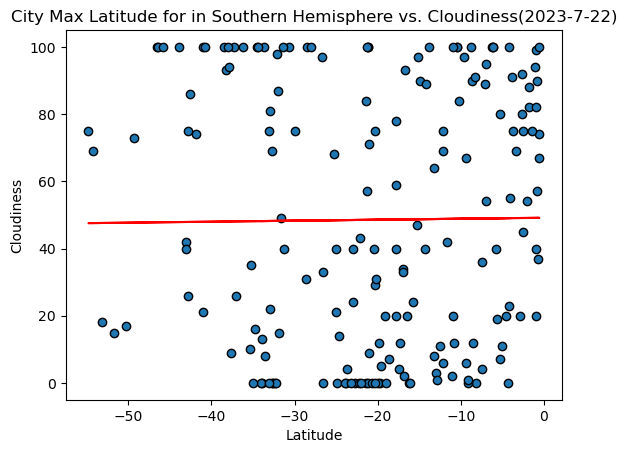

In [90]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], edgecolor='black')

# Pull from the regress function I made
line_y = regress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

# Plot the regress function
plt.plot(southern_hemi_df['Lat'],line_y, color='red')

# Add the regression and r squared values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
corr = f"Correlation (r): {rvalue:}"

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude for in Southern Hemisphere vs. Cloudiness(2023-7-22)')
# Show plot
print(equation)
print(corr)
plt.show()

**Discussion about the linear relationship:** 
- Again, the r squared values are extremely low hence there is no real correlation between latitude and cloudiness. This would indicate the Earth's cloudiness is close to evenly distributed.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.02x + 4.1
Correlation (r): -0.15108851491151348


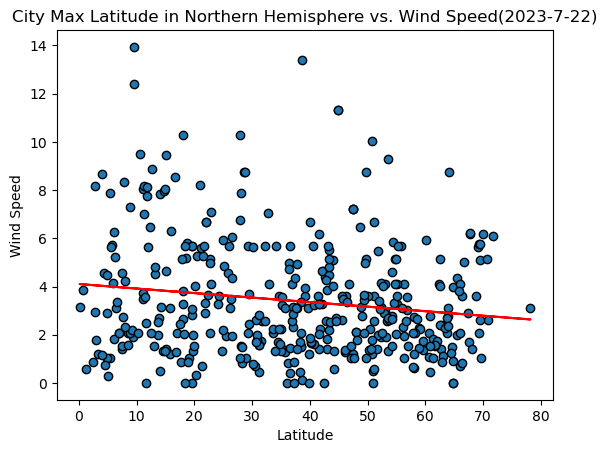

In [91]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], edgecolor='black')

# Pull from the regress function I made
line_y = regress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

# Plot the regress function
plt.plot(northern_hemi_df['Lat'],line_y, color='red')

# Add the regression and r squared values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
corr = f"Correlation (r): {rvalue:}"

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Max Latitude in Northern Hemisphere vs. Wind Speed(2023-7-22)')
# Show plot
print(equation)
print(corr)
plt.show()

y = -0.02x + 3.5
Correlation (r): -0.10743047704087942


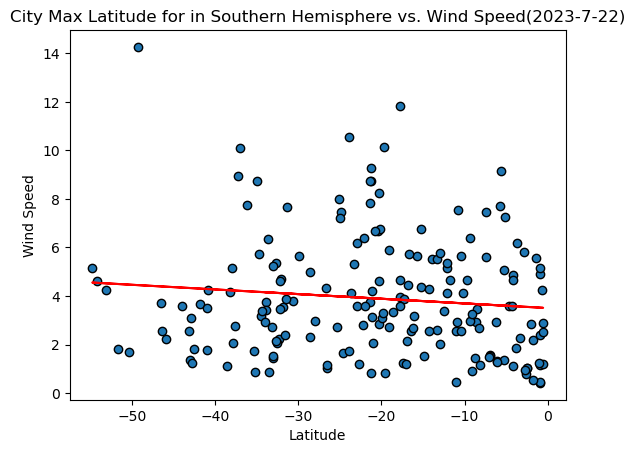

In [92]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], edgecolor='black')

# Pull from the regress function I made
line_y = regress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

# Plot the regress function
plt.plot(southern_hemi_df['Lat'],line_y, color='red')

# Add the regression and r squared values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
corr = f"Correlation (r): {rvalue:}"

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Max Latitude for in Southern Hemisphere vs. Wind Speed(2023-7-22)')
# Show plot
print(equation)
print(corr)
plt.show()

**Discussion about the linear relationship:** 
- Like the previous two, the r squared values are too low to suggest any strong correlation between latitude and speed. Perhaps, there is a slightly lower wind speed average at the north pole (if we were to stack the graphs), but there isn't much statistical backing. I think these graphs prove the world is flat.